In [123]:
import library as l

import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from scipy.stats import linregress

In [2]:
loadstring = []
loadstring.append('seed_1828_size_40000_topsize_300_date_2018-05-18')
loadstring.append('seed_16376_size_40000_topsize_300_date_2018-05-18')
loadstring.append('seed_23662_size_40000_topsize_300_date_2018-05-18')

loop = range(len(loadstring))

start_year = 2001
end_year = 2014

main = {}

for j, lstr in enumerate(loadstring):
    main[j] = {}

    main[j]['test_idx'] = {}
    for i, indx in enumerate(['/test_idx_' + str(start_year+x) + '.data' for x in range(end_year - start_year + 1)]):
        main[j]['test_idx'][i+1] = l.load_file(lstr + indx)

    main[j]['train_idx'] = {}
    for i, indx in enumerate(['/train_idx_' + str(start_year+x) + '.data' for x in range(end_year - start_year + 1)]):
        main[j]['train_idx'][i+1] = l.load_file(lstr + indx)

    main[j]['indices'] = l.load_file(lstr + '/indices.data')
    main[j]['ratings'] = l.load_file(lstr + '/ratings.data')

In [3]:
from collections import defaultdict
import json

def load_previous_data(indices, file='aggressive_dedup.json'):
    data = defaultdict(list)
    time = defaultdict(list)
    #ratings = defaultdict(list)
    
    idx = sorted([item for sublist in indices.values() for item in sublist])
    x = sorted(list(indices.keys()))
    for yr in x:
        data[yr] = list(np.zeros(len(indices[yr])))
        time[yr] = list(np.zeros(len(indices[yr])))
        #ratings[yr] = list(np.zeros(len(indices[yr])))
    with open(file) as infile:
        i = 0
        for line in infile:
            if i == idx[0]:
                idx.pop(0)
                x = json.loads(line)
                yr = x['reviewTime'][-4:]
                j = indices[yr].index(i)
                data[yr][j] = x.get('reviewText')
                time[yr][j] = x.get('reviewTime')
                #ratings[yr][j] = int(x.get('overall'))    
            i += 1
            if len(idx) == 0:
                break
    
    return data, time#, ratings

In [4]:
for z in loop:
    main[z]['data'], main[z]['time'] = load_previous_data(main[z]['indices'])
    #l.simplify_ratings(main[z]['data'], main[z]['ratings'])

In [5]:
savestring = []
savestring.append('seed_1828_size_40000_topsize_300_date_2018-05-18_all_in_CV')
savestring.append('seed_16376_size_40000_topsize_300_date_2018-05-18_all_in_CV')
savestring.append('seed_23662_size_40000_topsize_300_date_2018-05-18_all_in_CV')

loadstring = []
loadstring.append('seed_1828_size_40000_topsize_300_date_2018-05-18_all_in_CV')
loadstring.append('seed_16376_size_40000_topsize_300_date_2018-05-18_all_in_CV')
loadstring.append('seed_23662_size_40000_topsize_300_date_2018-05-18_all_in_CV')

for each in savestring:
    if not os.path.exists(each):
        os.makedirs(each)

In [25]:
x = sorted(main[z]['data'].keys())
z = 0

In [52]:
'''LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=300)
CV = CountVectorizer(ngram_range=(1,2), analyzer='word', min_df=5, max_features=5000)'''


'''
def get_all_features(data, train_idx, CV):
    CV.fit(data[train_idx])
    return list(CV.get_feature_names())
    
multi_features = []

for i, key in enumerate(x):
    multi_features += get_all_features(np.array(main[z]['data'][key]), main[z]['train_idx'][i+1], CV)'''



'''multi_features = sorted(list(set(multi_features)))

CV = CountVectorizer(ngram_range=(1,2), analyzer='word')
CV.fit(multi_features)

l.save_file(savestring[z] + '/CV.data', CV)'''



'''results = []

for i, key in enumerate(x):
    X_train = np.array(np.array(main[z]['data'][key]))[main[z]['train_idx'][i+1]]
    y_train = np.array(np.array(main[z]['ratings'][key]))[main[z]['train_idx'][i+1]]
    
    X_train = CV.transform(X_train)
    
    LR.fit(X_train,y_train)
    
    X_train = []
    y_train = []
    
    X_test = np.array(np.array(main[z]['data'][key]))[main[z]['test_idx'][i+1]]
    y_test = np.array(np.array(main[z]['ratings'][key]))[main[z]['test_idx'][i+1]]
    
    X_test = CV.transform(X_test)
    
    y_pred = LR.predict(X_test)
    l.save_file(savestring[z] + '/LR_' + str(key) + '.data', LR)
    print(key)
    print(LR.score(X_test, y_test))
    print()
    
    X_test = []
    y_test = []'''

#multi_features = []

"results = []\n\nfor i, key in enumerate(x):\n    X_train = np.array(np.array(main[z]['data'][key]))[main[z]['train_idx'][i+1]]\n    y_train = np.array(np.array(main[z]['ratings'][key]))[main[z]['train_idx'][i+1]]\n    \n    X_train = CV.transform(X_train)\n    \n    LR.fit(X_train,y_train)\n    \n    X_train = []\n    y_train = []\n    \n    X_test = np.array(np.array(main[z]['data'][key]))[main[z]['test_idx'][i+1]]\n    y_test = np.array(np.array(main[z]['ratings'][key]))[main[z]['test_idx'][i+1]]\n    \n    X_test = CV.transform(X_test)\n    \n    y_pred = LR.predict(X_test)\n    l.save_file(savestring[z] + '/LR_' + str(key) + '.data', LR)\n    print(key)\n    print(LR.score(X_test, y_test))\n    print()\n    \n    X_test = []\n    y_test = []"

In [28]:
### Load CV and LR

for j, lstr in enumerate(loadstring):
    main[j]['models'] = {}
    for i, model in enumerate(['/LR_' + str(start_year+x) + '.data' for x in range(end_year - start_year + 1)]):
        main[j]['models'][i+1] = l.load_file(lstr + model)
        
    main[j]['CV'] = l.load_file(lstr + '/CV.data')

In [106]:
### CONSTRUCT top_f and bot_f

x = sorted(main[z]['data'].keys())

for z in loop:
    main[z]['features'] = list(main[z]['CV'].get_feature_names())
    '''main[z]['top_f'] = {}
    main[z]['bot_f'] = {}
    
    for i, key in enumerate(x):
        if i == 0:
            main[z]['top_f'] = [[t,[len(main[z]['features'])-k]] for k, (_,t) in enumerate(sorted(zip(main[z]['models'][i+1].coef_[0], main[z]['features'])))][:(-201):-1]
            main[z]['bot_f'] = [[t,[k+1]] for k, (_,t) in enumerate(sorted(zip(main[z]['models'][i+1].coef_[0], main[z]['features'])))][:200]
        else:
            for j, m in enumerate(main[z]['top_f']):
                main[z]['top_f'][j][1] += [len(main[z]['features'])-k for k, (_,t) in enumerate(sorted(zip(main[z]['models'][i+1].coef_[0],main[z]['features']))) if t == m[0]]
            for j, m in enumerate(main[z]['bot_f']):    
                main[z]['bot_f'][j][1] += [k+1 for k, (_,t) in enumerate(sorted(zip(main[z]['models'][i+1].coef_[0],main[z]['features']))) if t == m[0]]'''

In [434]:
for z in loop:
    main[z].pop('bot_100_MRR_original', None)
    main[z].pop('bot_100_MRR_predicted', None)
    main[z].pop('bot_100_coef', None)
    main[z].pop('bot_100_coef_original', None)
    main[z].pop('bot_100_coef_predicted', None)
    main[z].pop('bot_100_coef_scaler', None)
    main[z].pop('bot_100_features', None)
    main[z].pop('bot_100_original', None)
    main[z].pop('bot_100_predicted', None)
    main[z].pop('bot_slopes', None)
    main[z].pop('bot_200_MRR_original', None)
    main[z].pop('bot_200_MRR_predicted', None)
    main[z].pop('bot_200_features', None)
    main[z].pop('bot_slopes_100_MRR', None)
    main[z].pop('bot_slopes_100_MRR_predicted', None)
    main[z].pop('bot_slopes_100_coef', None)
    main[z].pop('bot_slopes_100_coef_predicted', None)
    main[z].pop('bot_slopes_200_MRR_predicted', None)
    main[z].pop('bot_slopes_coef', None)
    main[z].pop('bots_coef', None)
    main[z].pop('top_100_MRR_original', None)
    main[z].pop('top_100_MRR_predicted', None)
    main[z].pop('top_100_coef', None)
    main[z].pop('top_100_coef_original', None)
    main[z].pop('bot_slopes_200_MRR', None)
    main[z].pop('top_100_coef_predicted', None)
    main[z].pop('top_100_coef_scaler', None)
    main[z].pop('top_100_features', None)
    main[z].pop('top_100_original', None)
    main[z].pop('top_100_predicted', None)
    main[z].pop('top_200_MRR_predicted', None)
    main[z].pop('top_200_features', None)
    main[z].pop('top_slopes', None)
    main[z].pop('top_slopes_100_MRR', None)
    main[z].pop('top_slopes_100_MRR_predicted', None)
    main[z].pop('top_slopes_100_coef', None)
    main[z].pop('top_slopes_100_coef_predicted', None)
    main[z].pop('top_slopes_200_MRR', None)
    main[z].pop('top_slopes_200_MRR_predicted', None)
    main[z].pop('top_slopes_coef', None)
    main[z].pop('tops', None)
    main[z].pop('bots', None)

In [435]:
print(sorted(main[z].keys()))

['CV', 'data', 'features', 'indices', 'models', 'ratings', 'test_idx', 'time', 'train_idx']


In [472]:
#HOWMANY = 100
#HOWMANY3 = 300

#HOWMANY = 200
#HOWMANY3 = 600

HOWMANY = 400
HOWMANY3 = 1200

In [473]:
for z in loop:
    
    # TOP
    main[z]['tops'] = {}
    for j, key in enumerate(x):
        for i, (_,t) in enumerate(sorted(zip(main[z]['models'][j+1].coef_[0], main[z]['features']), reverse=True)):
            main[z]['tops'][t] = []
            if i >= HOWMANY:
                break
    for j, key in enumerate(x):
        for i, (_,t) in enumerate(sorted(zip(main[z]['models'][j+1].coef_[0], main[z]['features']), reverse=True)):
            if not main[z]['tops'].get(t) is None:
                if i + 1 > HOWMANY3:
                    k = HOWMANY3
                else:
                    k = i + 1
                main[z]['tops'][t].append(k)
    main[z]['top_slopes'] = []
    temp = []
    for key, values in main[z]['tops'].items():
        main[z]['top_slopes'].append([key, values])
        temp.append(sum(values))
    main[z]['top_slopes'] = [y for (t,y) in sorted(zip(temp, main[z]['top_slopes']))]

    # BOT
    main[z]['bots'] = {}
    for j, key in enumerate(x):
        for i, (_,t) in enumerate(sorted(zip(main[z]['models'][j+1].coef_[0], main[z]['features']))):
            main[z]['bots'][t] = []
            if i >= HOWMANY:
                break
    for j, key in enumerate(x):
        for i, (_,t) in enumerate(sorted(zip(main[z]['models'][j+1].coef_[0], main[z]['features']))):
            if not main[z]['bots'].get(t) is None:
                if i + 1 > HOWMANY3:
                    k = HOWMANY3
                else:
                    k = i + 1
                main[z]['bots'][t].append(k)
    main[z]['bot_slopes'] = []
    temp = []
    for key, values in main[z]['bots'].items():
        main[z]['bot_slopes'].append([key, values])
        temp.append(sum(values))
    main[z]['bot_slopes'] = [y for (t,y) in sorted(zip(temp, main[z]['bot_slopes']))]

print(main[0]['top_slopes'][:10])
print()
print(main[0]['bot_slopes'][:10])

[['excellent', [3, 4, 4, 4, 3, 3, 1, 2, 3, 5, 5, 5, 4, 10]], ['great', [8, 16, 24, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]], ['highly', [2, 1, 1, 1, 5, 2, 3, 3, 6, 6, 8, 13, 9, 19]], ['perfect', [5, 8, 7, 15, 12, 8, 4, 6, 5, 3, 3, 3, 3, 3]], ['wonderful', [1, 2, 3, 3, 7, 5, 6, 7, 7, 13, 17, 23, 6, 28]], ['amazing', [4, 5, 2, 2, 9, 6, 8, 12, 13, 18, 14, 11, 12, 18]], ['awesome', [6, 3, 6, 6, 18, 29, 16, 43, 20, 35, 18, 17, 8, 15]], ['the best', [15, 15, 56, 17, 6, 9, 11, 10, 8, 9, 19, 20, 22, 25]], ['loved', [7, 31, 70, 26, 20, 15, 9, 15, 11, 17, 24, 8, 5, 6]], ['easy', [67, 72, 69, 10, 8, 4, 5, 5, 4, 4, 4, 4, 14, 4]]]

[['waste', [2, 3, 6, 1, 5, 6, 6, 4, 4, 6, 4, 4, 4, 8]], ['disappointed', [12, 8, 30, 7, 18, 8, 2, 6, 1, 1, 2, 1, 1, 4]], ['unfortunately', [1, 2, 2, 2, 8, 5, 3, 8, 3, 5, 10, 10, 15, 30]], ['poor', [8, 9, 3, 10, 20, 11, 5, 7, 8, 9, 7, 8, 10, 26]], ['bad', [20, 31, 70, 9, 1, 2, 1, 1, 2, 7, 9, 7, 30, 10]], ['nothing', [22, 24, 50, 13, 4, 3, 7, 3, 7, 8, 12, 13, 20, 19]], ['however'

In [474]:
# Get top 100 and bot 100 features

for z in loop:
    main[z]['top_' + str(HOWMANY) + '_features'] = {}
    main[z]['bot_' + str(HOWMANY) + '_features'] = {}
    
    for i, key in enumerate(x):
        main[z]['top_' + str(HOWMANY) + '_features'][i+1] = [t for k, (_,t) in enumerate(sorted(zip(main[z]['models'][i+1].coef_[0], main[z]['features'])))][:(-HOWMANY-1):-1]
        main[z]['bot_' + str(HOWMANY) + '_features'][i+1] = [t for k, (_,t) in enumerate(sorted(zip(main[z]['models'][i+1].coef_[0], main[z]['features'])))][:HOWMANY]

# Get top 100 and bot 100 feature MRR slopes based on years 01 - 08
for z in loop:
    main[z]['top_slopes_' + str(HOWMANY) + '_MRR'] = []
    temp = []
    for key, values in main[z]['tops'].items():
        main[z]['top_slopes_' + str(HOWMANY) + '_MRR'].append([key, values[:8]])
        temp.append(sum(values[:8]))
    main[z]['top_slopes_' + str(HOWMANY) + '_MRR'] = [y for (t,y) in sorted(zip(temp, main[z]['top_slopes_' + str(HOWMANY) + '_MRR']))]
    
for z in loop:
    main[z]['bot_slopes_' + str(HOWMANY) + '_MRR'] = []
    temp = []
    for key, values in main[z]['bots'].items():
        main[z]['bot_slopes_' + str(HOWMANY) + '_MRR'].append([key, values[:8]])
        temp.append(sum(values[:8]))
    main[z]['bot_slopes_' + str(HOWMANY) + '_MRR'] = [y for (t,y) in sorted(zip(temp, main[z]['bot_slopes_' + str(HOWMANY) + '_MRR']))]

In [475]:
'''results = {}
for z in loop:
    results[z] =[]
    LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=300)
    CV = CountVectorizer(ngram_range=(1,2), analyzer='word')

    x = sorted(main[z]['data'].keys())

    for i, key in enumerate(x):
        CV.fit(main[z]['top_100_features'][i+1]+main[z]['bot_100_features'][i+1])

        X_train = np.array(np.array(main[z]['data'][key]))[main[z]['train_idx'][i+1]]
        y_train = np.array(np.array(main[z]['ratings'][key]))[main[z]['train_idx'][i+1]]

        X_train = CV.transform(X_train)

        LR.fit(X_train,y_train)

        X_train = []
        y_train = []

        X_test = np.array(np.array(main[z]['data'][key]))[main[z]['test_idx'][i+1]]
        y_test = np.array(np.array(main[z]['ratings'][key]))[main[z]['test_idx'][i+1]]

        X_test = CV.transform(X_test)

        y_pred = LR.predict(X_test)
        l.save_file(savestring[z] + '/LR_100top_100bot_' + str(key) + '.data', LR)
        print(key)
        results[z].append(LR.score(X_test, y_test))
        print(results[z][-1])
        print()

        X_test = []
        y_test = []'''

"results = {}\nfor z in loop:\n    results[z] =[]\n    LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=300)\n    CV = CountVectorizer(ngram_range=(1,2), analyzer='word')\n\n    x = sorted(main[z]['data'].keys())\n\n    for i, key in enumerate(x):\n        CV.fit(main[z]['top_100_features'][i+1]+main[z]['bot_100_features'][i+1])\n\n        X_train = np.array(np.array(main[z]['data'][key]))[main[z]['train_idx'][i+1]]\n        y_train = np.array(np.array(main[z]['ratings'][key]))[main[z]['train_idx'][i+1]]\n\n        X_train = CV.transform(X_train)\n\n        LR.fit(X_train,y_train)\n\n        X_train = []\n        y_train = []\n\n        X_test = np.array(np.array(main[z]['data'][key]))[main[z]['test_idx'][i+1]]\n        y_test = np.array(np.array(main[z]['ratings'][key]))[main[z]['test_idx'][i+1]]\n\n        X_test = CV.transform(X_test)\n\n        y_pred = LR.predict(X_test)\n        l.save_file(savestring[z] + '/LR_100top_100bot_' + str(key) + '.data', LR)\n  

In [476]:
# Predicting slopes using LEAST SQUARES LINEAR FIT on MRR

for z in loop:
    main[z]['top_slopes_' + str(HOWMANY) + '_MRR_predicted'] = []
    pom = np.array([t for (q,t) in main[z]['top_slopes_' + str(HOWMANY) + '_MRR']])    
    ex = range(len(pom[0]))
    A = np.vstack([ex, np.ones(len(ex))]).T
    temp = []
    for i, vals in enumerate(pom):
        m, c = np.linalg.lstsq(A, vals, rcond=None)[0]
        main[z]['top_slopes_' + str(HOWMANY) + '_MRR_predicted'].append([main[z]['top_slopes_' + str(HOWMANY) + '_MRR'][i][0], [int(m*t + c) for t in range(10, 15)]])
        temp.append(sum([int(m*t + c) for t in range(10, 15)]))
    main[z]['top_slopes_' + str(HOWMANY) + '_MRR_predicted']  = [y for (t,y) in sorted(zip(temp, main[z]['top_slopes_' + str(HOWMANY) + '_MRR_predicted']))]
    
    main[z]['bot_slopes_' + str(HOWMANY) + '_MRR_predicted'] = []
    pom = np.array([t for (q,t) in main[z]['bot_slopes_' + str(HOWMANY) + '_MRR']])    
    x = range(len(pom[0]))
    A = np.vstack([x, np.ones(len(x))]).T
    temp = []
    for i, vals in enumerate(pom):
        m, c = np.linalg.lstsq(A, vals, rcond=None)[0]
        main[z]['bot_slopes_' + str(HOWMANY) + '_MRR_predicted'].append([main[z]['bot_slopes_' + str(HOWMANY) + '_MRR'][i][0], [int(m*t + c) for t in range(10, 15)]])
        temp.append(sum([int(m*t + c) for t in range(10, 15)]))
    main[z]['bot_slopes_' + str(HOWMANY) + '_MRR_predicted']  = [y for (t,y) in sorted(zip(temp, main[z]['bot_slopes_' + str(HOWMANY) + '_MRR_predicted']))]

In [477]:
for z in loop:
    main[z]['top_' + str(HOWMANY) + '_MRR_original'] = [k for (k,t) in main[z]['top_slopes_' + str(HOWMANY) + '_MRR']][:HOWMANY]
    main[z]['bot_' + str(HOWMANY) + '_MRR_original'] = [k for (k,t) in main[z]['bot_slopes_' + str(HOWMANY) + '_MRR']][:HOWMANY]
    main[z]['top_' + str(HOWMANY) + '_MRR_predicted'] = [k for (k,t) in main[z]['top_slopes_' + str(HOWMANY) + '_MRR_predicted']][:HOWMANY]
    main[z]['bot_' + str(HOWMANY) + '_MRR_predicted'] = [k for (k,t) in main[z]['bot_slopes_' + str(HOWMANY) + '_MRR_predicted']][:HOWMANY]

In [478]:
results_original_MRR = {}

for z in loop:
    results_original_MRR[z] = []
    
    LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=300)
    CV = CountVectorizer(ngram_range=(1,2), analyzer='word')

    x = sorted(main[z]['data'].keys())

    for i, key in enumerate(x[9:]):
        CV.fit(main[z]['top_' + str(HOWMANY) + '_MRR_original']+main[z]['bot_' + str(HOWMANY) + '_MRR_original'])

        X_train = np.array(np.array(main[z]['data'][key]))[main[z]['train_idx'][int(key)-2000]]
        y_train = np.array(np.array(main[z]['ratings'][key]))[main[z]['train_idx'][int(key)-2000]]

        X_train = CV.transform(X_train)

        LR.fit(X_train,y_train)

        X_train = []
        y_train = []

        X_test = np.array(np.array(main[z]['data'][key]))[main[z]['test_idx'][int(key)-2000]]
        y_test = np.array(np.array(main[z]['ratings'][key]))[main[z]['test_idx'][int(key)-2000]]

        X_test = CV.transform(X_test)

        y_pred = LR.predict(X_test)
        
        l.save_file(savestring[z] + '/LR_original_' + str(HOWMANY) + 'top_' + str(HOWMANY) + 'bot_' + str(key) + '_MRR.data', LR)
        
        results_original_MRR[z].append(LR.score(X_test, y_test))
        print(key + ': ', results_original_MRR[z][-1])
        X_test = []
        y_test = []

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


2010:  0.835
2011:  0.837125
2012:  0.855125
2013:  0.864125
2014:  0.864375
2010:  0.85375
2011:  0.832625
2012:  0.851375
2013:  0.871
2014:  0.860125
2010:  0.8525
2011:  0.843125
2012:  0.843
2013:  0.8465
2014:  0.86675


In [479]:
results_predicted_MRR = {}

for z in loop:
    results_predicted_MRR[z] = []
    
    LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=300)
    CV = CountVectorizer(ngram_range=(1,2), analyzer='word')

    x = sorted(main[z]['data'].keys())

    for i, key in enumerate(x[9:]):
        CV.fit(main[z]['top_' + str(HOWMANY) + '_MRR_predicted']+main[z]['bot_' + str(HOWMANY) + '_MRR_predicted'])

        X_train = np.array(np.array(main[z]['data'][key]))[main[z]['train_idx'][int(key)-2000]]
        y_train = np.array(np.array(main[z]['ratings'][key]))[main[z]['train_idx'][int(key)-2000]]

        X_train = CV.transform(X_train)

        LR.fit(X_train,y_train)

        X_train = []
        y_train = []

        X_test = np.array(np.array(main[z]['data'][key]))[main[z]['test_idx'][int(key)-2000]]
        y_test = np.array(np.array(main[z]['ratings'][key]))[main[z]['test_idx'][int(key)-2000]]

        X_test = CV.transform(X_test)

        y_pred = LR.predict(X_test)
        
        l.save_file(savestring[z] + '/LR_predicted_' + str(HOWMANY) + 'top_' + str(HOWMANY) + 'bot_' + str(key) + '_MRR.data', LR)
        
        results_predicted_MRR[z].append(LR.score(X_test, y_test))
        print(key + ': ', results_predicted_MRR[z][-1])
        X_test = []
        y_test = []

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


2010:  0.837375
2011:  0.837
2012:  0.855625
2013:  0.86125
2014:  0.86175
2010:  0.848625
2011:  0.831125
2012:  0.850625
2013:  0.868875
2014:  0.859
2010:  0.85025
2011:  0.844125
2012:  0.840625
2013:  0.846375
2014:  0.86425


In [480]:
#results_predicted
pred_MRR = []
for i, m in enumerate(results_predicted_MRR[0]):
    pom = []
    for z in loop:
        pom.append(results_predicted_MRR[z][i])
    pred_MRR.append(pom)
pred_MRR = np.array(pred_MRR)
    
orig_MRR = []
for i, m in enumerate(results_original_MRR[0]):
    pom = []
    for z in loop:
        pom.append(results_original_MRR[z][i])
    orig_MRR.append(pom)
orig_MRR = np.array(orig_MRR)

orig_MRR = orig_MRR.T
pred_MRR = pred_MRR.T

In [481]:
orig_MRR

array([[0.835   , 0.837125, 0.855125, 0.864125, 0.864375],
       [0.85375 , 0.832625, 0.851375, 0.871   , 0.860125],
       [0.8525  , 0.843125, 0.843   , 0.8465  , 0.86675 ]])

In [482]:
pred_MRR

array([[0.837375, 0.837   , 0.855625, 0.86125 , 0.86175 ],
       [0.848625, 0.831125, 0.850625, 0.868875, 0.859   ],
       [0.85025 , 0.844125, 0.840625, 0.846375, 0.86425 ]])

In [483]:
# original MRR

{0: [0.825875, 0.828375, 0.848625, 0.853625, 0.856125],
 1: [0.830875, 0.81525, 0.837, 0.84675, 0.850625],
 2: [0.836, 0.829375, 0.8255, 0.84025, 0.847875]}

# predicted MRR

{0: [0.82875, 0.830125, 0.85, 0.851375, 0.858875],
 1: [0.827375, 0.8155, 0.836625, 0.8485, 0.853],
 2: [0.8355, 0.82575, 0.83075, 0.8375, 0.855625]}

{0: [0.82875, 0.830125, 0.85, 0.851375, 0.858875],
 1: [0.827375, 0.8155, 0.836625, 0.8485, 0.853],
 2: [0.8355, 0.82575, 0.83075, 0.8375, 0.855625]}

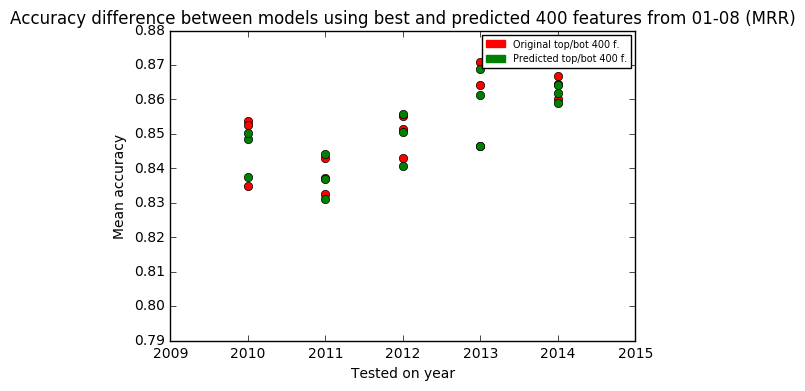

In [484]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([range(2010,2015) for x in range(3)], orig_MRR, 'ro')
ax.plot([range(2010,2015) for x in range(3)], pred_MRR, 'go')

red_patch = mpatches.Patch(color='r', label='Original top/bot ' + str(HOWMANY) + ' f.')
green_patch = mpatches.Patch(color='g', label='Predicted top/bot ' + str(HOWMANY) + ' f.')
ax.legend(handles=[red_patch, green_patch], fontsize='x-small', loc='upper right')

ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(range(2009,2016))

ax.set_ylim(0.79,0.88)

plt.xlabel('Tested on year')
plt.ylabel('Mean accuracy')
plt.title('Accuracy difference between models using best and predicted ' + str(HOWMANY) + ' features from 01-08 (MRR)')
plt.savefig('Accuracy_difference_of_original_and_predicted_' + str(HOWMANY) + '_features_MRR.jpeg', dpi=300)
plt.show()

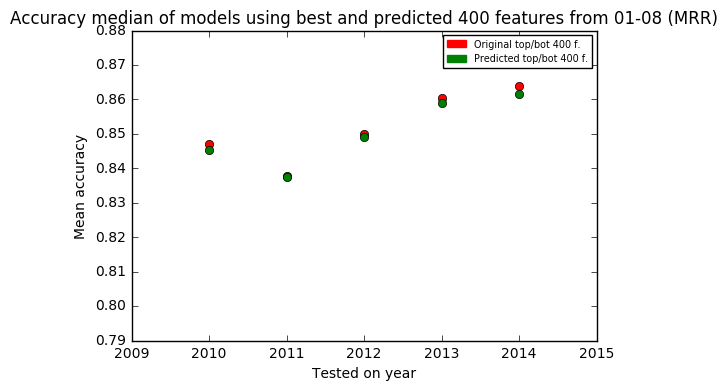

In [485]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(2010,2015), np.array(orig_MRR).mean(axis=0), 'ro')
ax.plot(range(2010,2015), np.array(pred_MRR).mean(axis=0), 'go')

red_patch = mpatches.Patch(color='r', label='Original top/bot ' + str(HOWMANY) + ' f.')
green_patch = mpatches.Patch(color='g', label='Predicted top/bot ' + str(HOWMANY) + ' f.')
ax.legend(handles=[red_patch, green_patch], fontsize='x-small', loc='upper right')

ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(range(2009,2016))

ax.set_ylim(0.79,0.88)

plt.xlabel('Tested on year')
plt.ylabel('Mean accuracy')
plt.title('Accuracy median of models using best and predicted ' + str(HOWMANY) + ' features from 01-08 (MRR)')
plt.savefig('Accuracy_median_of_original_and_predicted_' + str(HOWMANY) + '_features_MRR.jpeg', dpi=300)
plt.show()

In [486]:
##############  COEF ##########################

In [487]:
min_max_scaler = preprocessing.MinMaxScaler()
for z in loop:
    main[z]['top_' + str(HOWMANY) + '_coef'] = {}
    main[z]['bot_' + str(HOWMANY) + '_coef'] = {}
    main[z]['top_' + str(HOWMANY) + '_coef_scaler'] = {}
    main[z]['bot_' + str(HOWMANY) + '_coef_scaler'] = {}
    
    for i, key in enumerate(x):        
        main[z]['top_' + str(HOWMANY) + '_coef'][i+1] = min_max_scaler.fit_transform(np.array([r for k, (r,_) in enumerate(sorted(zip(main[z]['models'][i+1].coef_[0], main[z]['features'])))][:(-HOWMANY-1):-1]).reshape(HOWMANY,1))
        main[z]['top_' + str(HOWMANY) + '_coef_scaler'][i+1] = min_max_scaler

        main[z]['bot_' + str(HOWMANY) + '_coef'][i+1] = min_max_scaler.fit_transform(np.array([r for k, (r,_) in enumerate(sorted(zip(main[z]['models'][i+1].coef_[0], main[z]['features'])))][:HOWMANY]).reshape(HOWMANY,1))
        main[z]['bot_' + str(HOWMANY) + '_coef_scaler'][i+1] = min_max_scaler

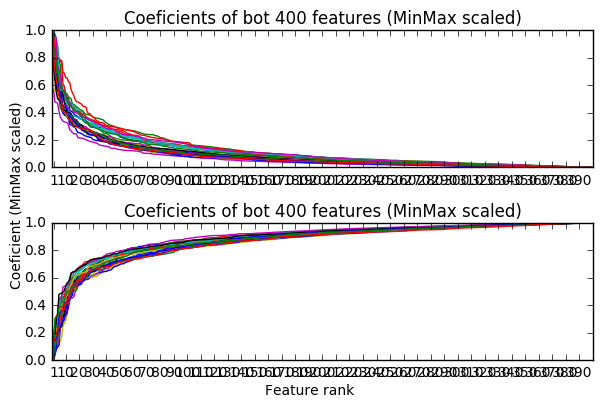

In [488]:
fig, (ax1, ax2) = plt.subplots(2, 1)

for z in loop:
    for i in range(8):
        ax1.plot(main[z]['top_' + str(HOWMANY) + '_coef'][i+1])   
ax1.set_title('Coeficients of bot ' + str(HOWMANY) + ' features (MinMax scaled)')
ax1.set_xticks([1] + list(range(10,HOWMANY, 10)))
ax1.set_ylim(0,1)

for z in loop:
    for i in range(8):
        ax2.plot(main[z]['bot_' + str(HOWMANY) + '_coef'][i+1])    
ax2.set_title('Coeficients of bot ' + str(HOWMANY) + ' features (MinMax scaled)')
ax2.set_xticks([1] + list(range(10,HOWMANY, 10)))
ax2.set_ylim(0,1)

fig.text(0.5, 0.001, 'Feature rank', ha='center')
fig.text(0.001, 0.5, 'Coeficient (MinMax scaled)', va='center', rotation='vertical')

fig.tight_layout()
plt.savefig('Coeficients_of_top_and_bot_' + str(HOWMANY) + '_features_(MinMax_scaled).jpeg', dpi=300)
plt.show()

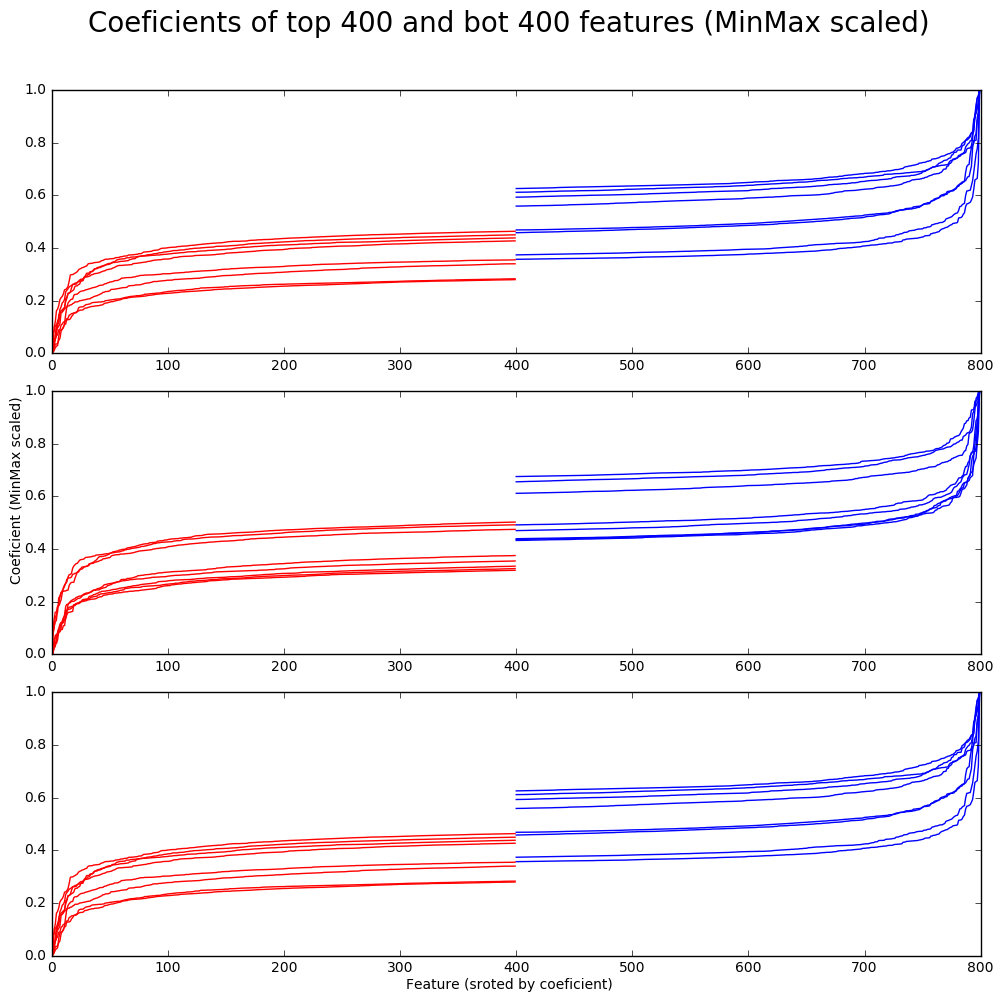

In [489]:
min_max_scaler = preprocessing.MinMaxScaler((0,1))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,10))

z = 0
for i in range(8):
    pom = sorted(min_max_scaler.fit_transform(np.array(main[z]['models'][i+1].coef_[0]).reshape(len(main[z]['models'][i+1].coef_[0]),1)))
    ax1.plot(np.array(range(0,HOWMANY)), np.array(pom[:HOWMANY]), color='r')
    ax1.plot(np.array(range(HOWMANY,2*HOWMANY)), np.array(pom[-HOWMANY:]), color='b')
#ax1.set_title('Coeficients of all features (MinMax scaled)')
ax1.set_ylim(0,1)

z = 1
for i in range(8):
    pom = sorted(min_max_scaler.fit_transform(np.array(main[z]['models'][i+1].coef_[0]).reshape(len(main[z]['models'][i+1].coef_[0]),1)))
    ax2.plot(np.array(range(0,HOWMANY)), np.array(pom[:HOWMANY]), color='r')
    ax2.plot(np.array(range(HOWMANY,2*HOWMANY)), np.array(pom[-HOWMANY:]), color='b')
ax2.set_ylim(0,1)

z = 0
for i in range(8):
    pom = sorted(min_max_scaler.fit_transform(np.array(main[z]['models'][i+1].coef_[0]).reshape(len(main[z]['models'][i+1].coef_[0]),1)))
    ax3.plot(np.array(range(0,HOWMANY)), np.array(pom[:HOWMANY]), color='r')
    ax3.plot(np.array(range(HOWMANY,2*HOWMANY)), np.array(pom[-HOWMANY:]), color='b')
ax3.set_ylim(0,1)

fig.text(0.5, 0.001, 'Feature (sroted by coeficient)', ha='center')
fig.text(0.001, 0.5, 'Coeficient (MinMax scaled)', va='center', rotation='vertical')
plt.suptitle('Coeficients of top ' + str(HOWMANY) + ' and bot ' + str(HOWMANY) + ' features (MinMax scaled)', fontsize=20)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('Coeficients_of_top' + str(HOWMANY) + '_and_bot' + str(HOWMANY) + '_features_(MinMax_scaled).jpeg', dpi=300)
plt.show()

In [490]:
min_max_scaler = preprocessing.MinMaxScaler((0,1))

for z in loop:
    
    # TOP
    main[z]['tops_coef'] = {}    
    for j, key in enumerate(x):
        for i, (_,t) in enumerate(sorted(zip(main[z]['models'][j+1].coef_[0], main[z]['features']), reverse=True)):
            main[z]['tops_coef'][t] = []
            if i >= HOWMANY:
                break
    for j, key in enumerate(x):
        for i, (r,t) in enumerate(sorted(zip(list(min_max_scaler.fit_transform(np.array(main[z]['models'][j+1].coef_[0]).reshape(-1,1)).reshape(-1,)), main[z]['features']), reverse=True)):
            if not main[z]['tops_coef'].get(t) is None:
                main[z]['tops_coef'][t].append(r)
    
    main[z]['top_slopes_coef'] = []
    temp = []
    for key, values in main[z]['tops_coef'].items():
        main[z]['top_slopes_coef'].append([key, values])
        temp.append(sum(values))
    main[z]['top_slopes_coef'] = [y for (t,y) in sorted(zip(temp, main[z]['top_slopes_coef']), reverse=True)]

    # BOT
    main[z]['bots_coef'] = {}
    for j, key in enumerate(x):
        for i, (_,t) in enumerate(sorted(zip(main[z]['models'][j+1].coef_[0], main[z]['features']))):
            main[z]['bots_coef'][t] = []
            if i >= HOWMANY:
                break
    for j, key in enumerate(x):
        for i, (r,t) in enumerate(sorted(zip(list(min_max_scaler.fit_transform(np.array(main[z]['models'][j+1].coef_[0]).reshape(-1,1)).reshape(-1,)), main[z]['features']))):
            if not main[z]['bots_coef'].get(t) is None:
                main[z]['bots_coef'][t].append(r)
    main[z]['bot_slopes_coef'] = []
    temp = []
    for key, values in main[z]['bots_coef'].items():
        main[z]['bot_slopes_coef'].append([key, values])
        temp.append(sum(values))
    main[z]['bot_slopes_coef'] = [y for (t,y) in sorted(zip(temp, main[z]['bot_slopes_coef']), reverse=True)]

print(main[0]['top_slopes_coef'][:10])
print()
print(main[0]['bot_slopes_coef'][:10])

[['great', [0.8083028629703779, 0.7873057275113016, 0.7638885659903155, 0.9063089635815567, 0.9999999999999999, 1.0, 0.8974200276020772, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], ['excellent', [0.9299491591856452, 0.9172549336327631, 0.9292214750708672, 0.9436653407546034, 0.664020013835112, 0.8947010455181943, 1.0, 0.8185682697342402, 0.8695328951937643, 0.6972179885795167, 0.6421740951862198, 0.6694364753607203, 0.774965678253245, 0.6120114575109851]], ['highly', [0.9603956286557902, 1.0, 1.0, 1.0, 0.6579417453295431, 0.9181417072715714, 0.8834115331681791, 0.7769633451686415, 0.7414550607409329, 0.67731100764381, 0.5911720799261431, 0.5680979998089063, 0.7098864963740069, 0.539000573161726]], ['love', [0.7103313363956213, 0.6503040478603755, 0.6185654670646535, 0.7394862071290685, 0.7233258087947576, 0.7917054116377213, 0.7789424808208806, 0.7575233545467859, 0.8950673206558823, 0.770156833960769, 0.7455021972962856, 0.8857177578999135, 0.9671136551780499, 0.9438649523719751]], ['perfect

In [491]:
# Get top 100 and bot 100 feature COEF slopes based on years 01 - 08
for z in loop:
    main[z]['top_slopes_' + str(HOWMANY) + '_coef'] = []
    temp = []
    for key, values in main[z]['tops_coef'].items():
        main[z]['top_slopes_' + str(HOWMANY) + '_coef'].append([key, values[:8]])
        temp.append(sum(values[:8]))
    main[z]['top_slopes_' + str(HOWMANY) + '_coef'] = [y for (t,y) in sorted(zip(temp, main[z]['top_slopes_' + str(HOWMANY) + '_coef']), reverse=True)]
    
for z in loop:
    main[z]['bot_slopes_' + str(HOWMANY) + '_coef'] = []
    temp = []
    for key, values in main[z]['bots_coef'].items():
        main[z]['bot_slopes_' + str(HOWMANY) + '_coef'].append([key, values[:8]])
        temp.append(sum(values[:8]))
    main[z]['bot_slopes_' + str(HOWMANY) + '_coef'] = [y for (t,y) in sorted(zip(temp, main[z]['bot_slopes_' + str(HOWMANY) + '_coef']), reverse=True)]

In [492]:
print(main[0]['top_slopes_' + str(HOWMANY) + '_coef'][:10])
print()
print(main[0]['bot_slopes_' + str(HOWMANY) + '_coef'][:10])

[['highly', [0.9603956286557902, 1.0, 1.0, 1.0, 0.6579417453295431, 0.9181417072715714, 0.8834115331681791, 0.7769633451686415]], ['great', [0.8083028629703779, 0.7873057275113016, 0.7638885659903155, 0.9063089635815567, 0.9999999999999999, 1.0, 0.8974200276020772, 1.0]], ['excellent', [0.9299491591856452, 0.9172549336327631, 0.9292214750708672, 0.9436653407546034, 0.664020013835112, 0.8947010455181943, 1.0, 0.8185682697342402]], ['wonderful', [1.0, 0.9383669946479554, 0.9694057197774839, 0.9695842896738271, 0.5932840483309529, 0.8247078264642597, 0.8077466532770559, 0.6554601854737983]], ['amazing', [0.9110238882683585, 0.9046407669088457, 0.9771710124182555, 0.9796599792510753, 0.5734314462210677, 0.797390924003776, 0.7106220563849388, 0.6162972079206911]], ['perfect', [0.9002203763379155, 0.8383783714415572, 0.8386520278168481, 0.7577499178728448, 0.5671869709125764, 0.7809112423732476, 0.8092531434099417, 0.6874065394104054]], ['awesome', [0.8426729419295651, 0.9346937696157529, 0.

In [493]:
# Predicting slopes using LEAST SQUARES LINEAR FIT on COEF

for z in loop:
    main[z]['top_slopes_' + str(HOWMANY) + '_coef_predicted'] = []
    pom = np.array([t for (q,t) in main[z]['top_slopes_' + str(HOWMANY) + '_coef']])    
    x = range(len(pom[0]))
    A = np.vstack([x, np.ones(len(x))]).T
    temp = []
    for i, vals in enumerate(pom):
        m, c = np.linalg.lstsq(A, vals, rcond=-1)[0]
        main[z]['top_slopes_' + str(HOWMANY) + '_coef_predicted'].append([main[z]['top_slopes_' + str(HOWMANY) + '_coef'][i][0], [m*t + c for t in range(10, 15)]])
        temp.append(sum([m*t + c for t in range(10, 15)]))
    main[z]['top_slopes_' + str(HOWMANY) + '_coef_predicted']  = [y for (t,y) in sorted(zip(temp, main[z]['top_slopes_' + str(HOWMANY) + '_coef_predicted']), reverse=True)]
    
    main[z]['bot_slopes_' + str(HOWMANY) + '_coef_predicted'] = []
    pom = np.array([t for (q,t) in main[z]['bot_slopes_' + str(HOWMANY) + '_coef']])    
    x = range(len(pom[0]))
    A = np.vstack([x, np.ones(len(x))]).T
    temp = []
    for i, vals in enumerate(pom):
        m, c = np.linalg.lstsq(A, vals, rcond=-1)[0]
        main[z]['bot_slopes_' + str(HOWMANY) + '_coef_predicted'].append([main[z]['bot_slopes_' + str(HOWMANY) + '_coef'][i][0], [m*t + c for t in range(10, 15)]])
        temp.append(sum([m*t + c for t in range(10, 15)]))
    main[z]['bot_slopes_' + str(HOWMANY) + '_coef_predicted']  = [y for (t,y) in sorted(zip(temp, main[z]['bot_slopes_' + str(HOWMANY) + '_coef_predicted']), reverse=True)]

In [494]:
print(main[0]['top_slopes_' + str(HOWMANY) + '_coef_predicted'][:10])

[['great', [1.1039044492629866, 1.135981554002376, 1.1680586587417658, 1.2001357634811556, 1.2322128682205453]], ['love', [0.835548874127617, 0.8531297756424454, 0.8707106771572737, 0.888291578672102, 0.9058724801869302]], ['easy', [0.8145906381232093, 0.8287330088428431, 0.8428753795624768, 0.8570177502821107, 0.8711601210017444]], ['excellent', [0.8292027819264578, 0.8202843591895392, 0.8113659364526207, 0.8024475137157022, 0.7935290909787837]], ['well', [0.6675874074476088, 0.6741623524030812, 0.6807372973585536, 0.687312242314026, 0.6938871872694983]], ['highly', [0.7096673469222897, 0.6804459010719934, 0.6512244552216973, 0.6220030093714009, 0.5927815635211047]], ['recommend', [0.6027915786129444, 0.6049976435926177, 0.607203708572291, 0.6094097735519642, 0.6116158385316375]], ['easy to', [0.593979490160198, 0.5843402377050995, 0.5747009852500009, 0.5650617327949023, 0.5554224803398038]], ['perfect', [0.6177769193799989, 0.5939780110235499, 0.5701791026671008, 0.5463801943106519, 

In [495]:
print([x[0] for x in main[0]['top_slopes_' + str(HOWMANY) + '_coef_predicted'][:20]])
print([x[0] for x in main[0]['top_slopes_' + str(HOWMANY) + '_coef'][:20]])

['great', 'love', 'easy', 'excellent', 'well', 'highly', 'recommend', 'easy to', 'perfect', 'best', 'price', 'the best', 'loves', 'works', 'this is', 'without', 'highly recommend', 'always', 'enjoyed', 'wonderful']
['highly', 'great', 'excellent', 'wonderful', 'amazing', 'perfect', 'awesome', 'easy', 'love', 'the best', 'not only', 'is great', 'loved', 'love this', 'highly recommend', 'this is', 'best', 'must', 'easy to', 'favorite']


In [496]:
for z in loop:
    main[z]['top_' + str(HOWMANY) + '_coef_original'] = [k for (k,t) in main[z]['top_slopes_' + str(HOWMANY) + '_coef']][:HOWMANY]
    main[z]['bot_' + str(HOWMANY) + '_coef_original'] = [k for (k,t) in main[z]['bot_slopes_' + str(HOWMANY) + '_coef']][:HOWMANY]
    main[z]['top_' + str(HOWMANY) + '_coef_predicted'] = [k for (k,t) in main[z]['top_slopes_' + str(HOWMANY) + '_coef_predicted']][:HOWMANY]
    main[z]['bot_' + str(HOWMANY) + '_coef_predicted'] = [k for (k,t) in main[z]['bot_slopes_' + str(HOWMANY) + '_coef_predicted']][:HOWMANY]

In [497]:
print(main[0]['top_' + str(HOWMANY) + '_coef_original'][:20])
print(main[0]['top_' + str(HOWMANY) + '_coef_predicted'][:20])

['highly', 'great', 'excellent', 'wonderful', 'amazing', 'perfect', 'awesome', 'easy', 'love', 'the best', 'not only', 'is great', 'loved', 'love this', 'highly recommend', 'this is', 'best', 'must', 'easy to', 'favorite']
['great', 'love', 'easy', 'excellent', 'well', 'highly', 'recommend', 'easy to', 'perfect', 'best', 'price', 'the best', 'loves', 'works', 'this is', 'without', 'highly recommend', 'always', 'enjoyed', 'wonderful']


In [498]:
print(len(main[0]['bot_' + str(HOWMANY) + '_coef_original']))
print(len(main[0]['bot_' + str(HOWMANY) + '_coef_predicted']))
print(len(main[0]['top_' + str(HOWMANY) + '_coef_original']))
print(len(main[0]['top_' + str(HOWMANY) + '_coef_predicted']))

400
400
400
400


In [499]:
results_original_coef = {}

for z in loop:
    results_original_coef[z] = []
    
    LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=300)
    CV = CountVectorizer(ngram_range=(1,2), analyzer='word')

    x = sorted(main[z]['data'].keys())

    for i, key in enumerate(x[9:]):
        CV.fit(main[z]['top_' + str(HOWMANY) + '_coef_original']+main[z]['bot_' + str(HOWMANY) + '_coef_original'])

        X_train = np.array(np.array(main[z]['data'][key]))[main[z]['train_idx'][int(key)-2000]]
        y_train = np.array(np.array(main[z]['ratings'][key]))[main[z]['train_idx'][int(key)-2000]]

        X_train = CV.transform(X_train)

        LR.fit(X_train,y_train)

        X_train = []
        y_train = []

        X_test = np.array(np.array(main[z]['data'][key]))[main[z]['test_idx'][int(key)-2000]]
        y_test = np.array(np.array(main[z]['ratings'][key]))[main[z]['test_idx'][int(key)-2000]]

        X_test = CV.transform(X_test)

        y_pred = LR.predict(X_test)
        
        l.save_file(savestring[z] + '/LR_original_' + str(HOWMANY) + 'top_' + str(HOWMANY) + 'bot_' + str(key) + '_coef.data', LR)
        
        results_original_coef[z].append(LR.score(X_test, y_test))
        print(key + ': ', results_original_coef[z][-1])
        X_test = []
        y_test = []

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


2010:  0.813
2011:  0.81575
2012:  0.83925
2013:  0.84425
2014:  0.845375
2010:  0.82125
2011:  0.80575
2012:  0.828625
2013:  0.847875
2014:  0.84125
2010:  0.825875
2011:  0.826875
2012:  0.8195
2013:  0.8375
2014:  0.842


In [500]:
results_predicted_coef = {}

for z in loop:
    results_predicted_coef[z] = []
    
    LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=300)
    CV = CountVectorizer(ngram_range=(1,2), analyzer='word')

    x = sorted(main[z]['data'].keys())

    for i, key in enumerate(x[9:]):
        CV.fit(main[z]['top_' + str(HOWMANY) + '_coef_predicted']+main[z]['bot_' + str(HOWMANY) + '_coef_predicted'])

        X_train = np.array(np.array(main[z]['data'][key]))[main[z]['train_idx'][int(key)-2000]]
        y_train = np.array(np.array(main[z]['ratings'][key]))[main[z]['train_idx'][int(key)-2000]]

        X_train = CV.transform(X_train)

        LR.fit(X_train,y_train)

        X_train = []
        y_train = []

        X_test = np.array(np.array(main[z]['data'][key]))[main[z]['test_idx'][int(key)-2000]]
        y_test = np.array(np.array(main[z]['ratings'][key]))[main[z]['test_idx'][int(key)-2000]]

        X_test = CV.transform(X_test)

        y_pred = LR.predict(X_test)
        
        l.save_file(savestring[z] + '/LR_predicted_' + str(HOWMANY) + 'top_' + str(HOWMANY) + 'bot_' + str(key) + '_coef.data', LR)
        
        results_predicted_coef[z].append(LR.score(X_test, y_test))
        print(key + ': ', results_predicted_coef[z][-1])
        X_test = []
        y_test = []

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


2010:  0.8125
2011:  0.814625
2012:  0.828625
2013:  0.8405
2014:  0.840625
2010:  0.82225
2011:  0.80375
2012:  0.829125
2013:  0.84425
2014:  0.8345
2010:  0.817625
2011:  0.82025
2012:  0.819875
2013:  0.830875
2014:  0.842875


In [501]:
#results_predicted
pred_coef = []
for i, m in enumerate(results_predicted_coef[0]):
    pom = []
    for z in loop:
        pom.append(results_predicted_coef[z][i])
    pred_coef.append(pom)
pred_coef = np.array(pred_coef)
    
orig_coef = []
for i, m in enumerate(results_original_coef[0]):
    pom = []
    for z in loop:
        pom.append(results_original_coef[z][i])
    orig_coef.append(pom)
orig_coef = np.array(orig_coef)

orig_coef = orig_coef.T
pred_coef = pred_coef.T

In [502]:
results_original_coef

{0: [0.813, 0.81575, 0.83925, 0.84425, 0.845375],
 1: [0.82125, 0.80575, 0.828625, 0.847875, 0.84125],
 2: [0.825875, 0.826875, 0.8195, 0.8375, 0.842]}

In [503]:
results_predicted_coef

{0: [0.8125, 0.814625, 0.828625, 0.8405, 0.840625],
 1: [0.82225, 0.80375, 0.829125, 0.84425, 0.8345],
 2: [0.817625, 0.82025, 0.819875, 0.830875, 0.842875]}

In [504]:
# original COEF

{0: [0.80425, 0.805375, 0.820625, 0.834125, 0.838375],
 1: [0.806625, 0.7955, 0.821125, 0.829625, 0.833],
 2: [0.814875, 0.810625, 0.808875, 0.827875, 0.8345]}

# predicted COEF

{0: [0.801875, 0.80625, 0.822625, 0.834625, 0.837],
 1: [0.814875, 0.793375, 0.821125, 0.833375, 0.829375],
 2: [0.815875, 0.80925, 0.816875, 0.82475, 0.834]}

{0: [0.801875, 0.80625, 0.822625, 0.834625, 0.837],
 1: [0.814875, 0.793375, 0.821125, 0.833375, 0.829375],
 2: [0.815875, 0.80925, 0.816875, 0.82475, 0.834]}

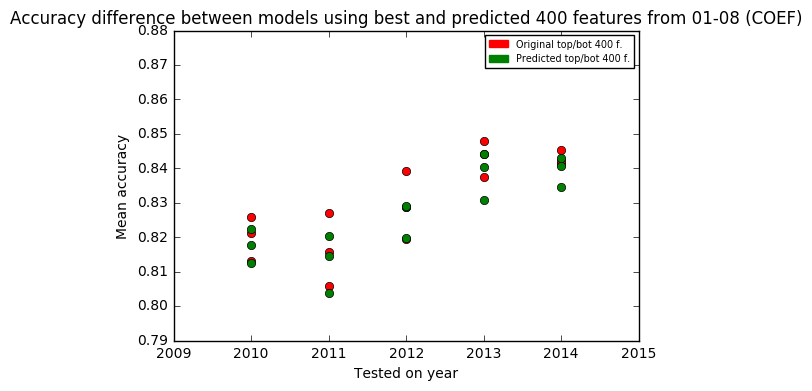

In [505]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([range(2010,2015) for x in range(3)], orig_coef, 'ro')
ax.plot([range(2010,2015) for x in range(3)], pred_coef, 'go')

red_patch = mpatches.Patch(color='r', label='Original top/bot ' + str(HOWMANY) + ' f.')
green_patch = mpatches.Patch(color='g', label='Predicted top/bot ' + str(HOWMANY) + ' f.')
ax.legend(handles=[red_patch, green_patch], fontsize='x-small', loc='upper right')

ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(range(2009,2016))

ax.set_ylim(0.79,0.88)

plt.xlabel('Tested on year')
plt.ylabel('Mean accuracy')
plt.title('Accuracy difference between models using best and predicted ' + str(HOWMANY) + ' features from 01-08 (COEF)')
plt.savefig('Accuracy_difference_of_original_and_predicted_' + str(HOWMANY) + '_features_COEF.jpeg', dpi=300)
plt.show()

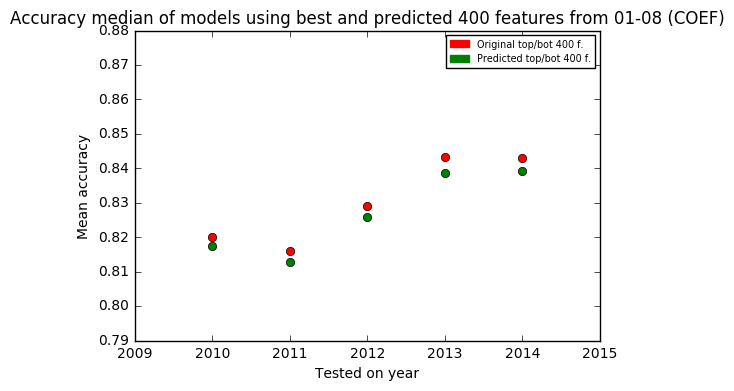

In [506]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(2010,2015), np.array(orig_coef).mean(axis=0), 'ro')
ax.plot(range(2010,2015), np.array(pred_coef).mean(axis=0), 'go')

red_patch = mpatches.Patch(color='r', label='Original top/bot ' + str(HOWMANY) + ' f.')
green_patch = mpatches.Patch(color='g', label='Predicted top/bot ' + str(HOWMANY) + ' f.')
ax.legend(handles=[red_patch, green_patch], fontsize='x-small', loc='upper right')

ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(range(2009,2016))

ax.set_ylim(0.79,0.88)

plt.xlabel('Tested on year')
plt.ylabel('Mean accuracy')
plt.title('Accuracy median of models using best and predicted ' + str(HOWMANY) + ' features from 01-08 (COEF)')
plt.savefig('Accuracy_median_of_original_and_predicted_' + str(HOWMANY) + '_features_COEF.jpeg', dpi=300)
plt.show()

In [507]:
print('Done.')

Done.


In [231]:
# Normal run 100top_100bot

{0: [0.865125,
  0.850125,
  0.852375,
  0.83175,
  0.80825,
  0.81875,
  0.845375,
  0.833,
  0.828625,
  0.8245,
  0.827,
  0.846125,
  0.854625,
  0.852875],
 1: [0.8605,
  0.84675,
  0.842375,
  0.832875,
  0.819875,
  0.83375,
  0.850875,
  0.84025,
  0.836625,
  0.834875,
  0.818375,
  0.84125,
  0.862375,
  0.8515],
 2: [0.85625,
  0.860375,
  0.8445,
  0.8325,
  0.813375,
  0.821375,
  0.853875,
  0.83725,
  0.8355,
  0.83975,
  0.83675,
  0.833875,
  0.844625,
  0.858625]}

{0: [0.865125,
  0.850125,
  0.852375,
  0.83175,
  0.80825,
  0.81875,
  0.845375,
  0.833,
  0.828625,
  0.8245,
  0.827,
  0.846125,
  0.854625,
  0.852875],
 1: [0.8605,
  0.84675,
  0.842375,
  0.832875,
  0.819875,
  0.83375,
  0.850875,
  0.84025,
  0.836625,
  0.834875,
  0.818375,
  0.84125,
  0.862375,
  0.8515],
 2: [0.85625,
  0.860375,
  0.8445,
  0.8325,
  0.813375,
  0.821375,
  0.853875,
  0.83725,
  0.8355,
  0.83975,
  0.83675,
  0.833875,
  0.844625,
  0.858625]}